(lesson3.2)=
# Lesson Wednesday September 18th

During today's lesson you'll work on a complex exercise on the topic of SymPy. Please ask your questions regarding the [homework](homework3.2) as well!

## Exercise SymPy

Given the following structure.

```{figure} intro_data/1.svg
:align: center
```

1. Find the normal force distribution

Given the following structure.

```{figure} intro_data/2.svg
:align: center
```

2. Find the bending moment distribution
3. Find the shear force distribution
4. Find the displacement distribution


````{admonition} Solution assignment 1
:class: tip, dropdown

Given the following coordinate system:
```{figure} ./intro_data/a_assen.svg
:align: center
```

```{figure} ./intro_data/ans1.svg
:align: center
```

$$N_\text{AC} = 8 x - 16 \text{  } \left(\text{ kN}\right)$$

$$N_\text{CD} = 32 \text{  } \left(\text{ kN}\right)$$

$$N_\text{DB} = -28 \text{  } \left(\text{ kN}\right)$$
````


````{admonition} Solution assignment 2
:class: tip, dropdown

Given the following coordinate system:
```{figure} ./intro_data/2_assen.svg
:align: center
```

```{figure} ./intro_data/ans2.svg
:align: center
```

$$M_\text{AB} = \cfrac{x^{3}}{2} - \cfrac{21 x^{2}}{2} + \cfrac{147 x}{4} - \cfrac{95}{4} \text{  } \left(\text{kNm}\right)$$

$$M_\text{BS} = \cfrac{x^{3}}{2} - \cfrac{21 x^{2}}{2} + \cfrac{183 x}{2} - \cfrac{595}{2}  \text{  } \left(\text{kNm}\right)$$

$$M_\text{SD} = 18 x - 126 \text{  } \left(\text{kNm}\right)$$

$$M_\text{DC} = 144 - 12 x \text{  } \left(\text{kNm}\right)$$

````


````{admonition} Solution assignment 3
:class: tip, dropdown

Given the following coordinate system:
```{figure} ./intro_data/2_assen.svg
:align: center
```

```{figure} ./intro_data/ans3.svg
:align: center
```

$$V_\text{AB} = \cfrac{3 x^{2}}{2} - 21 x + \cfrac{147}{4} \text{  } \left(\text{kN}\right)  $$

$$V_\text{BS} = \cfrac{3 x^{2}}{2} - 21 x + \cfrac{183}{2}  \text{  } \left(\text{kN}\right)$$

$$V_\text{SD} = 18 \text{  } \left(\text{kN}\right)$$

$$V_\text{DC} = -12 \text{  } \left(\text{kN}\right)$$

````

````{admonition} Solution assignment 4
:class: tip, dropdown

Given the following coordinate system:
```{figure} ./intro_data/2_assen.svg
:align: center
```

```{figure} ./intro_data/ans4.svg
:align: center
```

$$w_\text{AB} = - \cfrac{x^{5}}{120000} + \cfrac{7 x^{4}}{24000} - \cfrac{49 x^{3}}{24000} + \cfrac{19 x^{2}}{4800} \text{  } \left(\text{m}\right)$$

$$w_\text{BS} = - \cfrac{x^{5}}{120000} + \cfrac{7 x^{4}}{24000} - \cfrac{61 x^{3}}{12000} + \cfrac{119 x^{2}}{2400} - \cfrac{73 x}{320} + \cfrac{73}{192}  \text{  } \left(\text{m}\right)$$

$$w_\text{SD} = - \cfrac{x^{3}}{1000} + \cfrac{21 x^{2}}{1000} - \cfrac{20537 x}{150000} + \cfrac{7549}{25000} \text{  } \left(\text{m}\right)$$

$$w_\text{DC} = \cfrac{x^{3}}{1500} - \cfrac{3 x^{2}}{125} + \cfrac{40213 x}{150000} - \cfrac{11413}{12500} \text{  } \left(\text{m}\right)$$

````

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()

%config InlineBackend.figure_formats = ['svg']

def plot(w_list, x_range_list,ylabel):
    plt.figure()
    for i, w in enumerate(w_list):
        # check if x is the only symbol in the expression
        if len(w.free_symbols) > 1:
            raise ValueError('The expression must be a function of x only.')
        
        w_numpy = sym.lambdify(x, w)
        x_vals = np.linspace(x_range_list[i][0], x_range_list[i][1], 100)
        
        # if the expression is a constant, we need to make sure that it is broadcasted correctly
        if isinstance(w_numpy(x_vals),float) or isinstance(w_numpy(x_vals),int):
            w_numpy = np.vectorize(w_numpy)
            plt.plot([x_range_list[i][0], x_range_list[i][1]],[w_numpy(x_vals),w_numpy(x_vals)])
        else:
            plt.plot(x_vals,w_numpy(x_vals))

        plt.plot(x_vals,w_numpy(x_vals))
        plt.xlabel('$x$')
        plt.ylabel(ylabel)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.invert_yaxis()

'8 x - 16'

'32'

'-28'

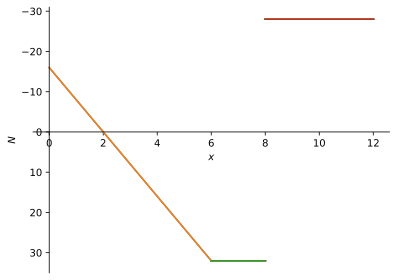

In [3]:
import sympy as sym

x = sym.symbols('x')
C1, C2, C3, C4, C5, C6 = sym.symbols('C1 C2 C3 C4 C5 C6')
EA = 3000

q_AC = - 8
q_CD = 0
q_DB = 0

N_AC = -sym.integrate(q_AC,x) + C1
N_CD = -sym.integrate(q_CD,x) + C2
N_DB = -sym.integrate(q_DB,x) + C3
eps_AC = N_AC / EA
eps_CD = N_CD / EA
eps_DB = N_DB / EA
u_AC = sym.integrate(eps_AC,x) + C4
u_CD = sym.integrate(eps_CD,x) + C5
u_DB = sym.integrate(eps_DB,x) + C6

Eq1 = sym.Eq(u_AC.subs(x,0),0)
Eq2 = sym.Eq(u_AC.subs(x,6),u_CD.subs(x,6))
Eq3 = sym.Eq(u_CD.subs(x,8),u_DB.subs(x,8))
Eq4 = sym.Eq(u_DB.subs(x,12),0)
Eq5 = sym.Eq(N_AC.subs(x,6),N_CD.subs(x,6))
Eq6 = sym.Eq(N_CD.subs(x,8),N_DB.subs(x,8)+60)

sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6), (C1,C2,C3,C4,C5,C6))

display(sym.latex(N_AC.subs(sol)),sym.latex(N_CD.subs(sol)),sym.latex(N_DB.subs(sol)))
plot([N_AC.subs(sol),N_CD.subs(sol),N_DB.subs(sol)],[[0,6],[6,8],[8,12]],'$N$')

'\\frac{x^{3}}{2} - \\frac{21 x^{2}}{2} + \\frac{147 x}{4} - \\frac{95}{4}'

'\\frac{x^{3}}{2} - \\frac{21 x^{2}}{2} + \\frac{183 x}{2} - \\frac{595}{2}'

'18 x - 126'

'144 - 12 x'

'\\frac{3 x^{2}}{2} - 21 x + \\frac{147}{4}'

'\\frac{3 x^{2}}{2} - 21 x + \\frac{183}{2}'

'18'

'-12'

'- \\frac{x^{5}}{120000} + \\frac{7 x^{4}}{24000} - \\frac{49 x^{3}}{24000} + \\frac{19 x^{2}}{4800}'

'- \\frac{x^{5}}{120000} + \\frac{7 x^{4}}{24000} - \\frac{61 x^{3}}{12000} + \\frac{119 x^{2}}{2400} - \\frac{73 x}{320} + \\frac{73}{192}'

'- \\frac{x^{3}}{1000} + \\frac{21 x^{2}}{1000} - \\frac{20537 x}{150000} + \\frac{7549}{25000}'

'\\frac{x^{3}}{1500} - \\frac{3 x^{2}}{125} + \\frac{40213 x}{150000} - \\frac{11413}{12500}'

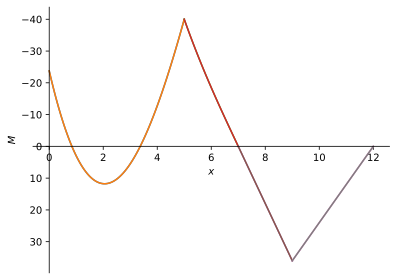

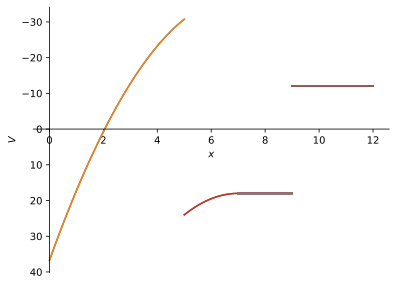

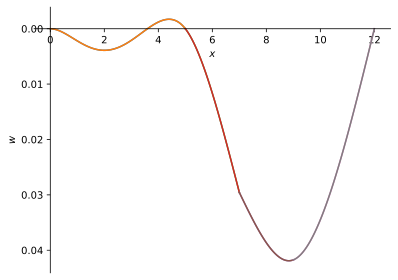

In [4]:
import sympy as sym

x = sym.symbols('x')
C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, C15, C16 = sym.symbols('C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15 C16')
EI = 3000
q0 = 21
F = 30

q_AB = sym.nsimplify(q0 - q0/7*x)
q_BS = sym.nsimplify(q0 - q0/7*x)
q_SD = 0
q_DC = 0

V_AB = -sym.integrate(q_AB,x) + C1
V_BS = -sym.integrate(q_BS,x) + C2
V_SD = -sym.integrate(q_SD,x) + C3
V_DC = -sym.integrate(q_DC,x) + C4
M_AB = sym.integrate(V_AB,x) + C5
M_BS = sym.integrate(V_BS,x) + C6
M_SD = sym.integrate(V_SD,x) + C7
M_DC = sym.integrate(V_DC,x) + C8
kappa_AB = M_AB / EI
kappa_BS = M_BS / EI
kappa_SD = M_SD / EI
kappa_DC = M_DC / EI
phi_AB = sym.integrate(kappa_AB,x) + C9
phi_BS = sym.integrate(kappa_BS,x) + C10
phi_SD = sym.integrate(kappa_SD,x) + C11
phi_DC = sym.integrate(kappa_DC,x) + C12
w_AB = -sym.integrate(phi_AB,x) + C13
w_BS = -sym.integrate(phi_BS,x) + C14
w_SD = -sym.integrate(phi_SD,x) + C15
w_DC = -sym.integrate(phi_DC,x) + C16

Eq1 = sym.Eq(w_AB.subs(x,0),0)
Eq2 = sym.Eq(phi_AB.subs(x,0),0)
Eq3 = sym.Eq(w_AB.subs(x,5),0)
Eq4 = sym.Eq(w_BS.subs(x,5),0)
Eq5 = sym.Eq(phi_AB.subs(x,5),phi_BS.subs(x,5))
Eq6 = sym.Eq(M_AB.subs(x,5),M_BS.subs(x,5))
Eq7 = sym.Eq(M_BS.subs(x,7),0)
Eq8 = sym.Eq(M_SD.subs(x,7),0)
Eq9 = sym.Eq(w_BS.subs(x,7),w_SD.subs(x,7))
Eq10= sym.Eq(V_BS.subs(x,7),V_SD.subs(x,7))
Eq11= sym.Eq(w_SD.subs(x,9),w_DC.subs(x,9))
Eq12= sym.Eq(phi_SD.subs(x,9),phi_DC.subs(x,9))
Eq13= sym.Eq(M_SD.subs(x,9),M_DC.subs(x,9))
Eq14= sym.Eq(V_SD.subs(x,9),V_DC.subs(x,9)+F)
Eq15= sym.Eq(w_DC.subs(x,12),0)
Eq16= sym.Eq(M_DC.subs(x,12),0)

sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8,Eq9,Eq10,Eq11,Eq12,Eq13,Eq14,Eq15,Eq16), (C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16))

display(sym.latex(M_AB.subs(sol)),sym.latex(M_BS.subs(sol)),sym.latex(M_SD.subs(sol)),sym.latex(M_DC.subs(sol)))
plot([M_AB.subs(sol),M_BS.subs(sol),M_SD.subs(sol),M_DC.subs(sol)],[[0,5],[5,7],[7,9],[9,12]],'$M$')
display(sym.latex(V_AB.subs(sol)),sym.latex(V_BS.subs(sol)),sym.latex(V_SD.subs(sol)),sym.latex(V_DC.subs(sol)))
plot([V_AB.subs(sol),V_BS.subs(sol),V_SD.subs(sol),V_DC.subs(sol)],[[0,5],[5,7],[7,9],[9,12]],'$V$')
display(sym.latex(w_AB.subs(sol)),sym.latex(w_BS.subs(sol)),sym.latex(w_SD.subs(sol)),sym.latex(w_DC.subs(sol)))
plot([w_AB.subs(sol),w_BS.subs(sol),w_SD.subs(sol),w_DC.subs(sol)],[[0,5],[5,7],[7,9],[9,12]],'$w$')

If you don't have Python and SymPy installed, click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding and use the cells below:

In [ ]:
import sympy as sym
sym.init_printing()

In [ ]:
x = sym.symbols('x')
C1, C2, C3, C4 = sym.symbols('C1 C2 C3 C4')

In [ ]:
q = 

In [ ]:
V = sym.integrate(-q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3
w = sym.integrate(-phi,x)+C4

In [ ]:
Eq1 = sym.Eq(

In [ ]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8,Eq9,Eq10,Eq11,Eq12), (C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12))
display(sol)

In [ ]:
M.subs(sol)

In [ ]:
plot(